# TABLE OF CONTENTS

Import libraries & dataframe

Add department names to dataframe

- [6. Create an appropriate visualization to show the distribution of profiles]
    - 6a. Create subset with unique user ids
    - 6b. Visualization for age_group profile
    - 6c. Visualization for income_level profile
    - 6d. Visualization for baby_flag profile
    - 6e. Visualization for the pet_flag profile
    - 6f. Visualization for the family_structure profile
    - 6g. Visualization for the age_group_class_level profile
- [7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure]
- [8. Compare your customer profiles with regions and departments]
    - 8a. Visualization for the number of orders per family structure and region
    - 8b. Visualization for the percentage of orders per family structure and region
    - 8c. Visualization for the number of orders per family structure and department
    - 8d. Visualization for the percentage of orders per family structure and department
    - 8e. Visualization for the number of orders per age group/class level and region
    - 8f. Visualization for the percentage of orders per age group/class level and region
    - 8g. Visualization for the number of orders per age group/class level and department
    - 8h. Visualization for the percentage of orders per age group/class level and department
    - 8i. Find the spending power of customers per region with customer profiles
       - I. Create crosstabs, combine their results as new dataframes
       - II. Visualization for the Average Spending Power per person by family structure & region
       - III. Visualization for the Average Spending Power per person by age-group/class level & region

KEY QUESTIONS
- [1. what the busiest days of the week and hours of the day]
- [2. particular times of the day when people spend the most money]
- [3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts]
- [4. Are there certain types of products that are more popular than others?]
- [5. The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ]
    - 5a. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?
    - 5b. Are there differences in ordering habits based on a customer’s loyalty status?
    - 5c. Are there differences in ordering habits based on a customer’s region?
    - 5d. Is there a connection between age and family status in terms of ordering habits?
       - I. Visualization for the Number of orders per day for each age-group/family status
       - II. Visualization for the Number of orders per hour for each age-group/family status
    - 5e. What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.
       - I. Average price of orders for age_group_fam_status profile
       - II. Visualization for the Average Amount Spent by Age Group and Family Status
       - III. Average price of orders for age_group_class_level profile
       - IV. Visualization for the Average Amount Spent by Age Group and Class Level
       - V. Average price of orders for age_group_class_level profile
       - VI. Visualization for the Average Amount Spent by Family Structure
       - VII. most popular product

Export dataframe

# Import libraries & dataframe

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing dataframe

co = pd.read_pickle(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\02 Data\Prepared Data\ultimate dataframe (T4.10.1) steps 1-5f.pkl")

In [ ]:
# Check head of dataframe

co.head()

# Add department names to dataframe

In [3]:
# Importing departments dataframe

deps = pd.read_csv(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\02 Data\Original Data\departments.csv")

In [ ]:
# Print the dataframe

deps

In [4]:
# Change "deps" department_id from int to string to match the main dataframe column's data type

deps['department_id'] = deps['department_id'].astype('str')

In [ ]:
# Check the change was made

deps.dtypes

In [ ]:
# Check main dataframe shape before merging

co.shape

In [5]:
# Merging department column to main dataframe

co = pd.merge(co, deps, on = 'department_id', how = 'left')

In [ ]:
# Checking the department column is added to the dataframe

co.head()

In [ ]:
# Check main dataframe shape after merging

co.shape

# 6. Create an appropriate visualization to show the distribution of profiles

## 6a. Create subset with unique user ids

In [ ]:
# Create subset with selected columns

subset_cols = ['user_id', 'age_group', 'income_level', 'baby_flag', 'pet_flag', 'family_structure', 'age_group_class_level']
co_subset = co[subset_cols]

In [ ]:
# Print co_subset

co_subset.head()

In [ ]:
# Check shape

co_subset.shape

In [ ]:
# Remove duplicates from subset to have only unique user_ids

co_subset = co_subset.drop_duplicates()

In [ ]:
# Check shape again

co_subset.shape

In [ ]:
# Print subset

co_subset.head()

In [ ]:
# Check the number of unique user_ids from the main dataframe to see if it matches the subset count

co['user_id'].nunique()

## 6b. Visualization for age_group profile

In [ ]:
# Create bar chart for the age_group profile

bar1 = co_subset['age_group'].value_counts().plot.bar()

plt.figure(figsize=(5, 5))
bar1.set_title("Distribution of Age Groups")

# Annotate each bar with its count
for idx, value in enumerate(co_subset['age_group'].value_counts()):
    bar1.text(idx, value, str(value), ha='center', va='bottom', fontsize=10, color='black')

In [ ]:
# Exporting bar chart

bar1.figure.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\age_groups_bar.png", bbox_inches='tight')

## 6c. Visualization for income_level profile

In [ ]:
# Create bar chart for the income_level profile

bar2 = co_subset['income_level'].value_counts().plot.bar()

plt.figure(figsize=(5, 5))
bar2.set_title("Distribution of Income Levels")

# Annotate each bar with its count
for idx, value in enumerate(co_subset['income_level'].value_counts()):
    bar2.text(idx, value, str(value), ha='center', va='bottom', fontsize=10, color='black')

In [ ]:
# Exporting bar chart

bar2.figure.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\income_levels_bar.png", bbox_inches='tight')

## 6d. Visualization for baby_flag profile

In [ ]:
# Calculate the value counts
value_counts = co_subset['baby_flag'].value_counts()

# Create the pie chart with value counts and count labels
plt.figure(figsize=(5, 5))
patches, texts, autotexts = plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=60)

# Add count values as labels
for i, (value, text) in enumerate(zip(value_counts, texts)):
    text.set_text(f'{value} ({value_counts.index[i]})')

# Title
plt.title('Users with VS without babies')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Save pie chart as image
plt.savefig('babies_piechart.png', dpi=300, bbox_inches='tight')

# Display the chart
plt.show()

In [ ]:
# Load the saved image
image1 = plt.imread('babies_piechart.png')

# Specify the full file path for the new image
new_chart_filepath1 = r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\babies_piechart.png"

# Save the image to the specified file path
plt.imsave(new_chart_filepath1, image1)

# Print the file path for reference
print(f"Image saved at: {new_chart_filepath1}")

## 6e. Visualization for the pet_flag profile

In [ ]:
# Calculate the value counts
value_counts2 = co_subset['pet_flag'].value_counts()

# Create the pie chart with value counts and count labels
plt.figure(figsize=(5, 5))
patches, texts, autotexts = plt.pie(value_counts2, labels=value_counts2.index, autopct='%1.1f%%', startangle=60)

# Add count values as labels
for i, (value, text) in enumerate(zip(value_counts2, texts)):
    text.set_text(f'{value} ({value_counts2.index[i]})')

# Title
plt.title('Users with VS without pets')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Save pie chart as image
plt.savefig('pets_piechart.png', dpi=300, bbox_inches='tight')

# Display the chart
plt.show()

In [ ]:
# Load the saved image
image = plt.imread('pets_piechart.png')

# Specify the full file path for the new image
new_chart_filepath = r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\pets_piechart.png"

# Save the image to the specified file path
plt.imsave(new_chart_filepath, image)

# Print the file path for reference
print(f"Image saved at: {new_chart_filepath}")

## 6f. Visualization for the family_structure profile

In [ ]:
# Create bar chart for the family_structure profile

bar3 = co_subset['family_structure'].value_counts().plot.bar()

plt.figure(figsize=(5, 5))
bar3.set_title("Distribution of Family Structures")

# Annotate each bar with its count
for idx, value in enumerate(co_subset['family_structure'].value_counts()):
    bar3.text(idx, value, str(value), ha='center', va='bottom', fontsize=10, color='black')

In [ ]:
# Exporting bar chart

bar3.figure.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\fam_structure_bar.png", bbox_inches='tight')

## 6g. Visualization for the age_group_class_level profile

In [ ]:
# Create bar chart for the age_group_class_level profile

bar4 = co_subset['age_group_class_level'].value_counts().plot.bar()

plt.figure(figsize=(5, 5))
bar4.set_title("Distribution of Age Groups by Socioeconomic Status")

# Annotate each bar with its count
for idx, value in enumerate(co_subset['age_group_class_level'].value_counts()):
    bar4.text(idx, value, str(value), ha='center', va='bottom', fontsize=10, color='black')

In [ ]:
# Exporting bar chart

bar4.figure.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\age_group_class_level_bar.png", bbox_inches='tight')

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [ ]:
# Allow all columns in dataframe to show up

pd.set_option('display.max_columns', None)

In [ ]:
# Print main dataframe

co.head()

In [ ]:
# Show min, mean and max for the 'prices' variable group by the 'family_structure' customer profile

co.groupby('family_structure').agg({'prices': ['min', 'mean', 'max']})

In [ ]:
# Show min, mean and max for the 'max_order' variable group by the 'family_structure' customer profile

co.groupby('family_structure').agg({'max_order': ['min', 'mean', 'max']})

In [ ]:
# Show min, mean and max for the 'prices' variable group by the 'age_group_class_level' customer profile

co.groupby('age_group_class_level').agg({'prices': ['min', 'mean', 'max']})

In [ ]:
# Show min, mean and max for the 'max_order' variable group by the 'age_group_class_level' customer profile

co.groupby('age_group_class_level').agg({'max_order': ['min', 'mean', 'max']})

# 8. Compare your customer profiles with regions and departments

## 8a. Visualization for the number of orders per family structure and region

In [ ]:
# Create crosstab to compare the number of orders per family structure within each region

ords_fam_struc_reg = pd.crosstab(co['Region'], co['family_structure'], dropna = False)

# Print the crosstab

ords_fam_struc_reg

In [ ]:
# Create a stacked bar chart with a colormap
crosst1 = ords_fam_struc_reg.plot(kind='bar', stacked=True, colormap='Pastel2', title='Number of orders per family structure and region')

# Set labels
plt.xlabel('Region')
plt.ylabel('Family Structure')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
# Export chart

crosst1.figure.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\ords_famstruc_region_bar.png", bbox_inches='tight')

## 8b. Visualization for the percentage of orders per family structure and region

In [ ]:
# Create crosstab to compare the number of orders per family structure within each region (normalized to percentages)

ords_fam_struc_reg_norm = pd.crosstab(co['Region'], co['family_structure'], normalize = 'index', dropna = False)

# Print the crosstab

ords_fam_struc_reg_norm

In [ ]:
# Create a stacked bar chart with a colormap
crosst2 = ords_fam_struc_reg_norm.plot(kind='bar', stacked=True, colormap='Pastel2', title='Number of orders per family structure and region (normalized)')

# Set labels
plt.xlabel('Region')
plt.ylabel('Family Structure')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
# Export chart

crosst2.figure.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\ords_famstruc_region_normalized_bar.png", bbox_inches='tight')

## 8c. Visualization for the number of orders per family structure and department

In [ ]:
# Create crosstab to compare the number of orders per family structure and department

ords_fam_struc_dep = pd.crosstab(co['department'], co['family_structure'], dropna = False)

# Print the crosstab

ords_fam_struc_dep

In [ ]:
# Calculate the sum of orders for each department
department_order1 = ords_fam_struc_dep.sum(axis=1).sort_values(ascending=False).index

# Reorder the crosstab based on the sorted departments
ords_fam_struc_dep_ordered = ords_fam_struc_dep.loc[department_order1]

# Create a stacked bar chart with horizontal bars
crosst3 = ords_fam_struc_dep_ordered.plot(kind='barh', stacked=True, colormap='Pastel1', title='Number of orders per family structure & department', figsize=(10, 7))

# Set labels
plt.xlabel('Family structure')
plt.ylabel('Department')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
# Export chart

crosst3.figure.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\ords_famstruc_department_bar.png", bbox_inches='tight')

## 8d. Visualization for the percentage of orders per family structure and department

In [ ]:
# Create crosstab to compare the number of orders per family structure and department (normalized to percentages)

ords_fam_struc_dep_norm = pd.crosstab(co['department'], co['family_structure'], normalize = 'index', dropna = False)

# Print the crosstab

ords_fam_struc_dep_norm

In [ ]:
# Create stacked bar chart with horizontal bars
crosst4 = ords_fam_struc_dep_norm.plot(kind='barh', stacked=True, colormap='Pastel1', title='Number of orders per family structure & department (normalized)', figsize=(10, 7))

# Set labels
plt.xlabel('Family Structure')
plt.ylabel('Department')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
# Export chart

crosst4.figure.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\ords_famstruc_department_normalized_bar.png", bbox_inches='tight')

## 8e. Visualization for the number of orders per age group/class level and region

In [ ]:
# Create crosstab to compare the number of orders per age group/class level within each region

ords_age_class_reg = pd.crosstab(co['Region'], co['age_group_class_level'], dropna = False)

# Print the crosstab

ords_age_class_reg

In [ ]:
# Create a stacked bar chart with a colormap
crosst5 = ords_age_class_reg.plot(kind='bar', stacked=True, colormap='Pastel2', title='Number of orders per age-group/class level and region')

# Set labels
plt.xlabel('Region')
plt.ylabel('Age-group/class level')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
# Export chart

crosst5.figure.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\ords_age_class_region_bar.png", bbox_inches='tight')

## 8f. Visualization for the percentage of orders per age group/class level and region

In [ ]:
# Create crosstab to compare the number of orders per age group/class level within each region (normalized to percentages)

ords_age_class_reg_norm = pd.crosstab(co['Region'], co['age_group_class_level'], normalize = 'index', dropna = False)

# Print the crosstab

ords_age_class_reg_norm

In [ ]:
# Create a stacked bar chart with a colormap
crosst6 = ords_age_class_reg_norm.plot(kind='bar', stacked=True, colormap='Pastel2', title='Number of orders per age-group/class level and region (normalized)')

# Set labels
plt.xlabel('Region')
plt.ylabel('Age-group/class level')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
# Export chart

crosst6.figure.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\ords_age_class_region_normalized_bar.png", bbox_inches='tight')

## 8g. Visualization for the number of orders per age group/class level and department

In [ ]:
# Create crosstab to compare the number of orders per age group/class level and department

ords_age_class_dep = pd.crosstab(co['department'], co['age_group_class_level'], dropna = False)

# Print the crosstab

ords_age_class_dep

In [ ]:
# Calculate the sum of orders for each department
department_order = ords_age_class_dep.sum(axis=1).sort_values(ascending=False).index

# Reorder the crosstab based on the sorted departments
ords_age_class_dep_ordered = ords_age_class_dep.loc[department_order]

# Create a stacked bar chart with horizontal bars
crosst7 = ords_age_class_dep_ordered.plot(kind='barh', stacked=True, colormap='Pastel1', title='Number of orders per age-group/class level & department', figsize=(10, 7))

# Set labels
plt.xlabel('Age-group/class level')
plt.ylabel('Department')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
# Export chart

crosst7.figure.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\ords_age_class_department_bar.png", bbox_inches='tight')

## 8h. Visualization for the percentage of orders per age group/class level and department

In [ ]:
# Create crosstab to compare the number of orders per age group/class level and department (normalized to percentages)

ords_age_class_dep_norm = pd.crosstab(co['department'], co['age_group_class_level'], normalize = 'index', dropna = False)

# Print the crosstab

ords_age_class_dep_norm

In [ ]:
# Create stacked bar chart with horizontal bars
crosst8 = ords_age_class_dep_norm.plot(kind='barh', stacked=True, colormap='Pastel1', title='Number of orders per age-group/class level & department (normalized)', figsize=(10, 7))

# Set labels
plt.xlabel('Age-group/class level')
plt.ylabel('Department')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


In [ ]:
# Export chart

crosst8.figure.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\ords_age_class_department_normalized_bar.png", bbox_inches='tight')

## 8i. Find the spending power of customers per region with customer profiles

### I. Create crosstabs, combine their results as new dataframes

In [ ]:
# Create subset with unique ids

co_unique = co.drop_duplicates(subset=['user_id'])

In [ ]:
# Check the shape of the dataframe

len(co_unique)

In [ ]:
# Check the number of unique user ids in the main dataframe

co_unique['user_id'].nunique()

In [ ]:
# Create crosstab to see the number of customers based on family structure and region

uniquefams_region = pd.crosstab(co_unique['Region'], co_unique['family_structure'], dropna = False)

# Print crosstab

uniquefams_region

In [ ]:
# Print crosstab

ords_fam_struc_reg

In [ ]:
# Create crosstab to see the number of customers based on age-group/class level and region

uniqueclass_region = pd.crosstab(co_unique['Region'], co_unique['age_group_class_level'], dropna = False)

# Print crosstab

uniqueclass_region

In [ ]:
# Print crosstab

ords_age_class_reg

I took the "uniquefams_region" crosstab and the "ords_fam_struc_reg" crosstab to Excel to calculate the average spending power per customer according to their family structure and region by dividing the number of orders by the number of customers. I then saved the resulting table as a CSV file to import here. 
The process was done with the "uniqueclass_region" and "ords_age_class_reg" crosstabs to see the spending power per age-group/class level.
I will now import both tables.

### II. Visualization for the Average Spending Power per person by family structure & region

In [ ]:
# Importing the table for spending power by family structure

fam_spend = pd.read_csv(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\02 Data\Prepared Data\Task 4.10 fam_spending.csv", index_col = False)

In [ ]:
# Print dataframe

fam_spend

In [ ]:
# Set 'family_structure' as index and transpose the DataFrame
fam_spend.set_index('family_structure', inplace=True)
fam_spend = fam_spend.T

# Rename the index and column names
fam_spend.index.name = 'family_structure'
fam_spend.columns.name = 'Region'

# Drop the first column with NaN values
fam_spend = fam_spend.drop(columns=fam_spend.columns[0])

In [ ]:
# Show dataframe

fam_spend

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 6))
fam_spend_heat = sns.heatmap(fam_spend, annot=True, cmap='YlGnBu', fmt='g', linewidths=0.5)

# Set the title and labels
plt.title('Average Spending Power per person by family structure & region')
plt.xlabel('Region')
plt.ylabel('Family Structure')

This heatmap shows that the customer group 'single adult caring for family' in the Northeast and South have the most spending power, ie. they spend the most per person out of every region. 
On the other hand, the 'single adult with no kid' in the Northeast and 'two-parent, 1 kid household' in the South spend the least. 

In [ ]:
# Export chart

fam_spend_heat.figure.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\spend_family_region_heat.png", bbox_inches='tight')

### III. Visualization for the Average Spending Power per person by age-group/class level & region

In [ ]:
# Importing the table for spending power by age-group/class level

class_spend = pd.read_csv(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\02 Data\Prepared Data\Task 4.10 class_spending.csv", index_col = False)

In [ ]:
# Print dataframe

class_spend

In [ ]:
# Set 'age_group_class_level' as index and transpose the DataFrame
class_spend.set_index('age_group_class_level', inplace=True)
class_spend = class_spend.T

# Rename the index and column names
class_spend.index.name = 'age_group_class_level'
class_spend.columns.name = 'Region'

# Drop the first column with NaN values
class_spend = class_spend.drop(columns=class_spend.columns[0])

In [ ]:
# Check the changes to the dataframe were executed

class_spend

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 6))
class_spend_heat = sns.heatmap(class_spend, annot=True, cmap='YlGnBu', fmt='g', linewidths=0.5)

# Set the title and labels
plt.title('Average Spending Power per person by age-group/class level & region')
plt.xlabel('Region')
plt.ylabel('Age-group/class level')

# Show the heatmap
plt.show()

This heatmap shows that, as one would expect, the upper class young adult spends the most in all regions, especially in the south. The lowest spender is the lower class senior in all regions.

In [ ]:
# Export chart

class_spend_heat.figure.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\spend_age_class_region_heat.png", bbox_inches='tight')

# KEY QUESTIONS

In [ ]:
co.head()

# 1. what the busiest days of the week and hours of the day

In [ ]:
# Create bar chart for days of the week
plt.figure(figsize=(10, 6))
bar6 = co['orders_day_of_week'].value_counts().sort_index().plot.bar(color='teal')

# Set title and labels
plt.title("Number of Orders per Day of the Week")
plt.xlabel("Days of the week")
plt.ylabel("Number of Orders")


The busiest days are Saturday and Sunday.

In [ ]:
# Export chart

bar6.figure.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\ords_per_day_bar.png", bbox_inches='tight')

In [ ]:
# Create bar chart for hour of the day
plt.figure(figsize=(10, 6))
bar52 = co['order_hour_of_day'].value_counts().sort_index().plot.bar(color='teal')

# Set title and labels
plt.title("Number of Orders per Hour of the Day")
plt.xlabel("Hour of day")
plt.ylabel("Number of Orders")

The two busiest hours are 10 and 11am, but the most consistently busy period is from 10am to 3pm.

In [ ]:
# Export chart

bar52.figure.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\ords_per_hour_bar.png", bbox_inches='tight')

# 2. particular times of the day when people spend the most money

In [ ]:
# Group data by order_hour_of_day and sum prices
hourly_prices = co.groupby('order_hour_of_day')['prices'].sum()

# Create the bar chart
plt.figure(figsize=(10, 6))
bar7 = plt.bar(hourly_prices.index, hourly_prices.values, color='teal')

# Set titles and labels
plt.title('Money spent per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Spent')

# Save the chart to a file
plt.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\spend_per_hour_bar.png", bbox_inches='tight')

There seems to be a strong correlation between the number of orders and the amount of money spent, because the times of day when people spend the most is exactly when there are the most orders. 

# 3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts

This has already been done when creating the 'price_range_loc' variable was created in previous exercises, specifically in Exercise 4.7. 

In [ ]:
# Create pie chart based on the 'price_range_loc' variable

# Calculate the value counts
value_counts3 = co['price_range_loc'].value_counts()

# Create the pie chart with value counts and count labels
plt.figure(figsize=(5, 5))
patches, texts, autotexts = plt.pie(value_counts3, labels=value_counts3.index, autopct='%1.1f%%', startangle=60)

# Add count values as labels
for i, (value, text) in enumerate(zip(value_counts3, texts)):
    text.set_text(f'{value} ({value_counts3.index[i]})')

# Title
plt.title('Distribution of Price Ranges')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Save pie chart as image
plt.savefig('price_range_piechart.png', dpi=300, bbox_inches='tight')

# Display the chart
plt.show()


In [ ]:
# Load the saved image
image3 = plt.imread('price_range_piechart.png')

# Specify the full file path for the new image
new_chart_filepath3 = r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\price_range_piechart.png"

# Save the image to the specified file path
plt.imsave(new_chart_filepath3, image3)

# Print the file path for reference
print(f"Image saved at: {new_chart_filepath3}")

# 4. Are there certain types of products that are more popular than others?

In [ ]:
# Create bar chart for 'department' variable
plt.figure(figsize=(10, 6))
bar621 = co['department'].value_counts().sort_values(ascending = True).plot.barh(color='teal')

# Set title and labels
plt.title("Popularity of Product Categories")
plt.xlabel("Category")
plt.ylabel("Number of Orders")

The 3 most popular product categories are produce, dairy eggs and snacks. 

In [ ]:
# Export chart

bar621.figure.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\popularity_products_bar.png", bbox_inches='tight')

# 5. The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ

## 5a. What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

In [ ]:
# Create a pie chart to see the distribution of customer loyalty categories

loyalty_pie = co['loyalty_flag'].value_counts().plot.pie(figsize = (5,5), autopct='%1.0f%%', startangle=90)

plt.ylabel('')
plt.title('Distribution of Customer Loyalty Levels',fontsize=13)

Most customers are in the 'regular category' with 10 to 39 recorded orders.

In [ ]:
# Export chart

loyalty_pie.figure.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\customer_loyalty_pie.png", bbox_inches='tight')

## 5b. Are there differences in ordering habits based on a customer’s loyalty status?

In [ ]:
# Create crosstab 
crss_day_loyalty = pd.crosstab(index = co['orders_day_of_week'], columns = co['loyalty_flag'])

# Create line chart
line_day_loyal = crss_day_loyalty.plot(kind ='line', figsize = (10, 6))

plt.title('Number of orders per day of the week for each loyalty level')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")

# Save the chart to a file
plt.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\orders_per_day_loyalty_line.png", bbox_inches='tight')

## 5c. Are there differences in ordering habits based on a customer’s region?

In [ ]:
# Create crosstab 
crss_day_region = pd.crosstab(index = co['orders_day_of_week'], columns = co['Region'])

# Create line chart
line_day_region = crss_day_region.plot(kind ='line', figsize = (10, 6))

plt.title('Number of orders per day of the week per region')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")

# Save the chart to a file
plt.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\orders_per_day_region_line.png", bbox_inches='tight')

## 5d. Is there a connection between age and family status in terms of ordering habits?

In [ ]:
# Check the values for the variable

co['fam_status'].value_counts()

In [ ]:
# Check the values for the variable

co['age_group'].value_counts()

In [6]:
# Create an age_group/fam_status customer profile

co.loc[(co['fam_status'] == 'married') & (co['age_group'] == 'young adult'), 'age_group_fam_status'] = 'married young adult'

co.loc[(co['fam_status'] == 'married') & (co['age_group'] == 'middle-age adult'), 'age_group_fam_status'] = 'married middle-aged'

co.loc[(co['fam_status'] == 'married') & (co['age_group'] == 'senior'), 'age_group_fam_status'] = 'married senior'

co.loc[((co['fam_status'] == 'single') | (co['fam_status'] == 'divorced/widowed')) & (co['age_group'] == 'young adult'), 'age_group_fam_status'] = 'single young adult'

co.loc[((co['fam_status'] == 'single') | (co['fam_status'] == 'divorced/widowed')) & (co['age_group'] == 'middle-age adult'), 'age_group_fam_status'] = 'single middle-aged'

co.loc[((co['fam_status'] == 'single') | (co['fam_status'] == 'divorced/widowed')) & (co['age_group'] == 'senior'), 'age_group_fam_status'] = 'single senior'

co.loc[(co['fam_status'] == 'living with parents and siblings') & (co['age_group'] == 'young adult'), 'age_group_fam_status'] = 'young adult living with family'

co.loc[(co['fam_status'] == 'living with parents and siblings') & (co['age_group'] == 'middle-age adult'), 'age_group_fam_status'] = 'middle-aged living with family'

co.loc[(co['fam_status'] == 'living with parents and siblings') & (co['age_group'] == 'senior'), 'age_group_fam_status'] = 'senior living with family'



In [7]:
# Check customer profile was added to dataframe

co.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,customer_activity,age_group,income_level,provider_status,baby_flag,pet_flag,family_structure,age_group_class_level,department,age_group_fam_status
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,regular activity,young adult,low income,has kids,no babies,no pets,"two-parent, multi-kid household",lower class young adult,beverages,married young adult
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,regular activity,young adult,low income,has kids,no babies,no pets,"two-parent, multi-kid household",lower class young adult,beverages,married young adult
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,regular activity,young adult,low income,has kids,no babies,no pets,"two-parent, multi-kid household",lower class young adult,beverages,married young adult
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,regular activity,young adult,low income,has kids,no babies,no pets,"two-parent, multi-kid household",lower class young adult,beverages,married young adult
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,regular activity,young adult,low income,has kids,no babies,no pets,"two-parent, multi-kid household",lower class young adult,beverages,married young adult


### I. Visualization for the Number of orders per day for each age-group/family status


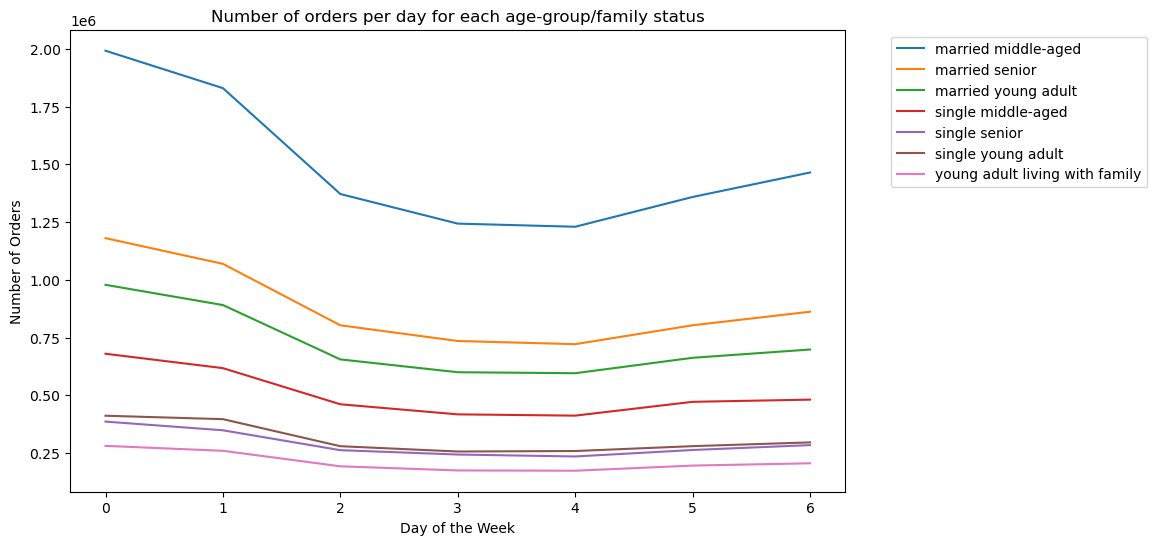

In [212]:
# Create crosstab 
crss_day_age_fam = pd.crosstab(index = co['orders_day_of_week'], columns = co['age_group_fam_status'])

# Create line chart
line_day_age_fam = crss_day_age_fam.plot(kind ='line', figsize = (10, 6))

plt.title('Number of orders per day for each age-group/family status')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")

# Save the chart to a file
plt.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\orders_per_day_age_fam_line.png", bbox_inches='tight')

### II. Visualization for the Number of orders per hour for each age-group/family status

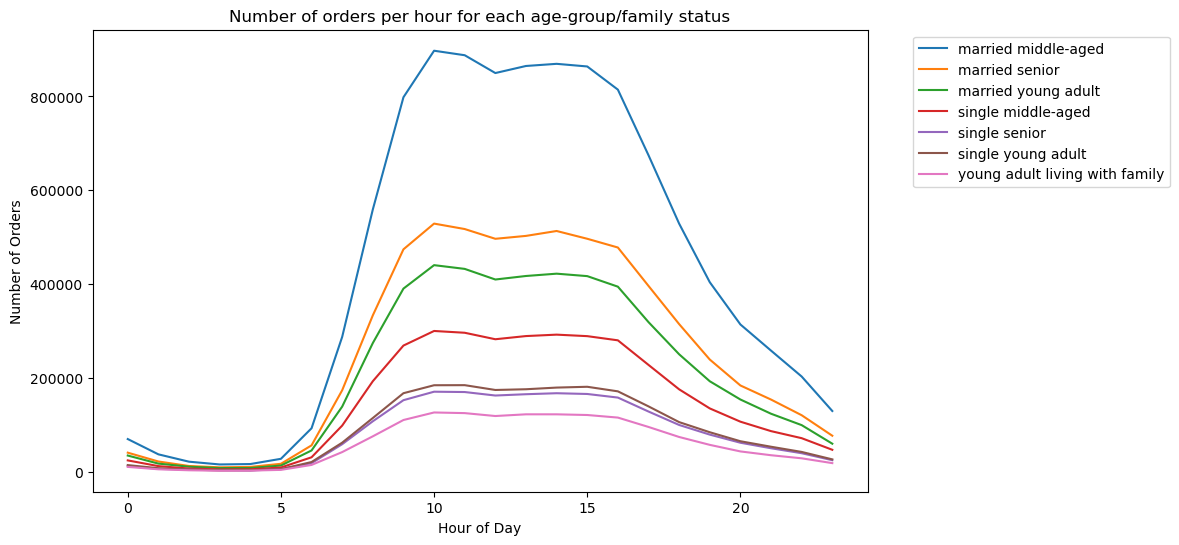

In [213]:
# Create crosstab 
crss_hour_age_fam = pd.crosstab(index = co['order_hour_of_day'], columns = co['age_group_fam_status'])

# Create line chart
line_hour_age_fam = crss_hour_age_fam.plot(kind ='line', figsize = (10, 6))

plt.title('Number of orders per hour for each age-group/family status')
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")

# Save the chart to a file
plt.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\orders_per_hour_age_fam_line.png", bbox_inches='tight')

## 5e. What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.

### I. Average price of orders for age_group_fam_status profile

In [146]:
grouby_agefam_prices = co.groupby('age_group_fam_status').agg({'prices': ['mean']})

# Print table
grouby_agefam_prices

,prices
,mean
age_group_fam_status,
married middle-aged,7.791930
married senior,7.794990
married young adult,7.781142
single middle-aged,7.788102
single senior,7.801982
single young adult,7.780360
young adult living with family,7.800604


### II. Visualization for the Average Amount Spent by Age Group and Family Status

In [147]:
# Reset the column multi-index
grouby_agefam_prices.columns = grouby_agefam_prices.columns.droplevel(0)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'married middle-aged'),
  Text(1, 0, 'married senior'),
  Text(2, 0, 'married young adult'),
  Text(3, 0, 'single middle-aged'),
  Text(4, 0, 'single senior'),
  Text(5, 0, 'single young adult'),
  Text(6, 0, 'young adult living with family')])

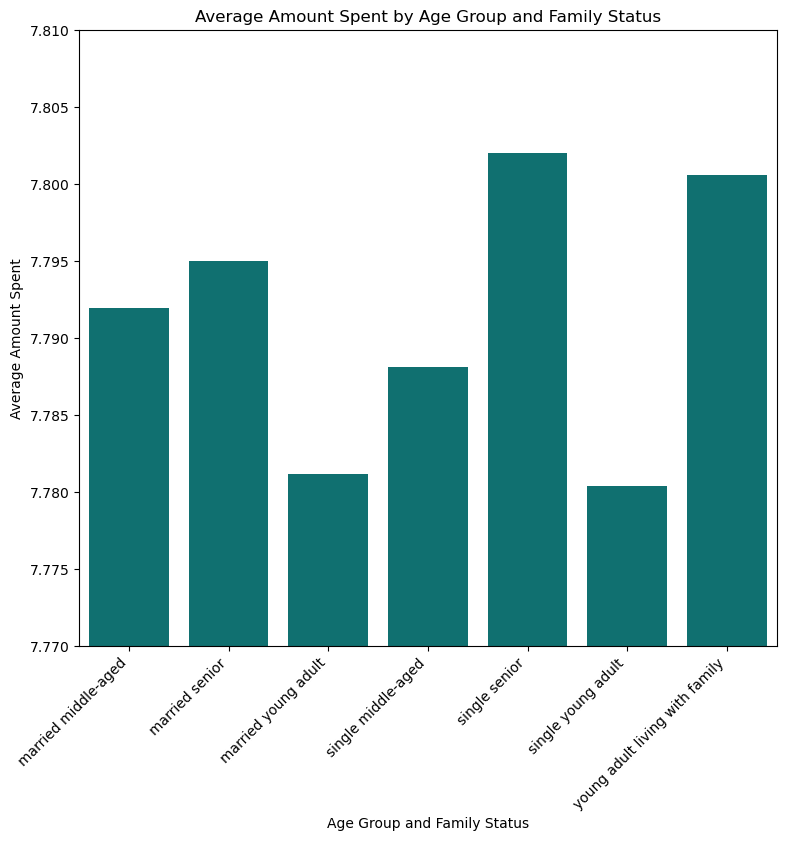

In [164]:
# Create the bar chart
plt.figure(figsize=(9, 8))
bar_chart11 = sns.barplot(data=grouby_agefam_prices, x=grouby_agefam_prices.index, y='mean', color='teal')

# Set title and labels
plt.title("Average Amount Spent by Age Group and Family Status")
plt.xlabel("Age Group and Family Status")
plt.ylabel("Average Amount Spent")

# Set y-axis limits
plt.ylim(7.77,7.81)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

In [214]:
# Export chart

bar_chart11.figure.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\spend_age_fam_bar.png", bbox_inches='tight')

### III. Average price of orders for age_group_class_level profile

In [149]:
groupby_ageclass_prices = co.groupby('age_group_class_level').agg({'prices': ['mean']})

# Print table
groupby_ageclass_prices

,prices
,mean
age_group_class_level,
lower class middle-aged,7.080507
lower class senior,6.711427
lower class young adult,7.596907
middle class middle-aged,7.959445
middle class senior,7.956199
middle class young adult,7.949485
upper class middle-aged,7.949191
upper class senior,7.957881


### IV. Visualization for the Average Amount Spent by Age Group and Class Level

In [150]:
# Reset the column multi-index
groupby_ageclass_prices.columns = groupby_ageclass_prices.columns.droplevel(0)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'lower class middle-aged'),
  Text(1, 0, 'lower class senior'),
  Text(2, 0, 'lower class young adult'),
  Text(3, 0, 'middle class middle-aged'),
  Text(4, 0, 'middle class senior'),
  Text(5, 0, 'middle class young adult'),
  Text(6, 0, 'upper class middle-aged'),
  Text(7, 0, 'upper class senior'),
  Text(8, 0, 'upper class young adult')])

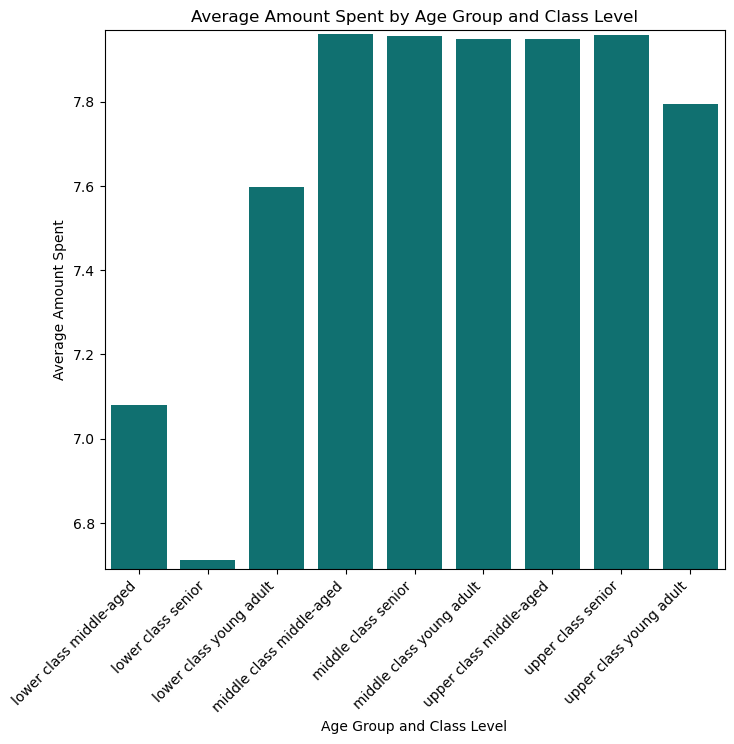

In [151]:
# Create the bar chart
plt.figure(figsize=(8, 7))
bar_chart22 = sns.barplot(data=groupby_ageclass_prices, x=groupby_ageclass_prices.index, y='mean', color='teal')

# Set title and labels
plt.title("Average Amount Spent by Age Group and Class Level")
plt.xlabel("Age Group and Class Level")
plt.ylabel("Average Amount Spent")

# Set y-axis limits
plt.ylim(6.69, 7.97)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

In [215]:
# Export chart

bar_chart22.figure.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\spend_age_class_bar.png", bbox_inches='tight')

### V. Average price of orders for age_group_class_level profile

In [152]:
groupby_famstruct_prices = co.groupby('family_structure').agg({'prices': ['mean']})

# Print table
groupby_famstruct_prices

,prices
,mean
family_structure,
single adult caring for family,7.800604
"single adult, no kid household",7.789550
"two-parent, 1 kid household",7.795589
"two-parent, multi-kid household",7.787643


### VI. Visualization for the Average Amount Spent by Family Structure

In [153]:
# Reset the column multi-index
groupby_famstruct_prices.columns = groupby_famstruct_prices.columns.droplevel(0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'single adult caring for family'),
  Text(1, 0, 'single adult, no kid household'),
  Text(2, 0, 'two-parent, 1 kid household'),
  Text(3, 0, 'two-parent, multi-kid household')])

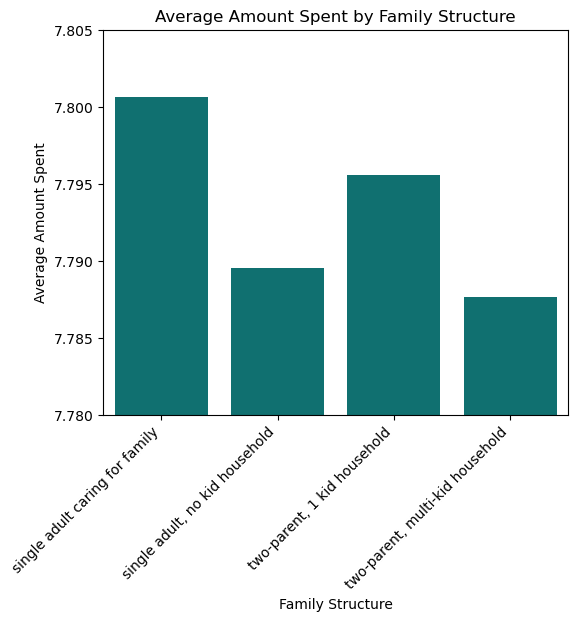

In [165]:
# Create the bar chart
plt.figure(figsize=(6, 5))
bar_chart33 = sns.barplot(data=groupby_famstruct_prices, x=groupby_famstruct_prices.index, y='mean', color='teal')

# Set title and labels
plt.title("Average Amount Spent by Family Structure")
plt.xlabel("Family Structure")
plt.ylabel("Average Amount Spent")

# Set y-axis limits
plt.ylim(7.780, 7.805)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

In [216]:
# Export chart

bar_chart33.figure.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\spend_fam_bar.png", bbox_inches='tight')

### VII. most popular product

####  Per Age Group and Family Status

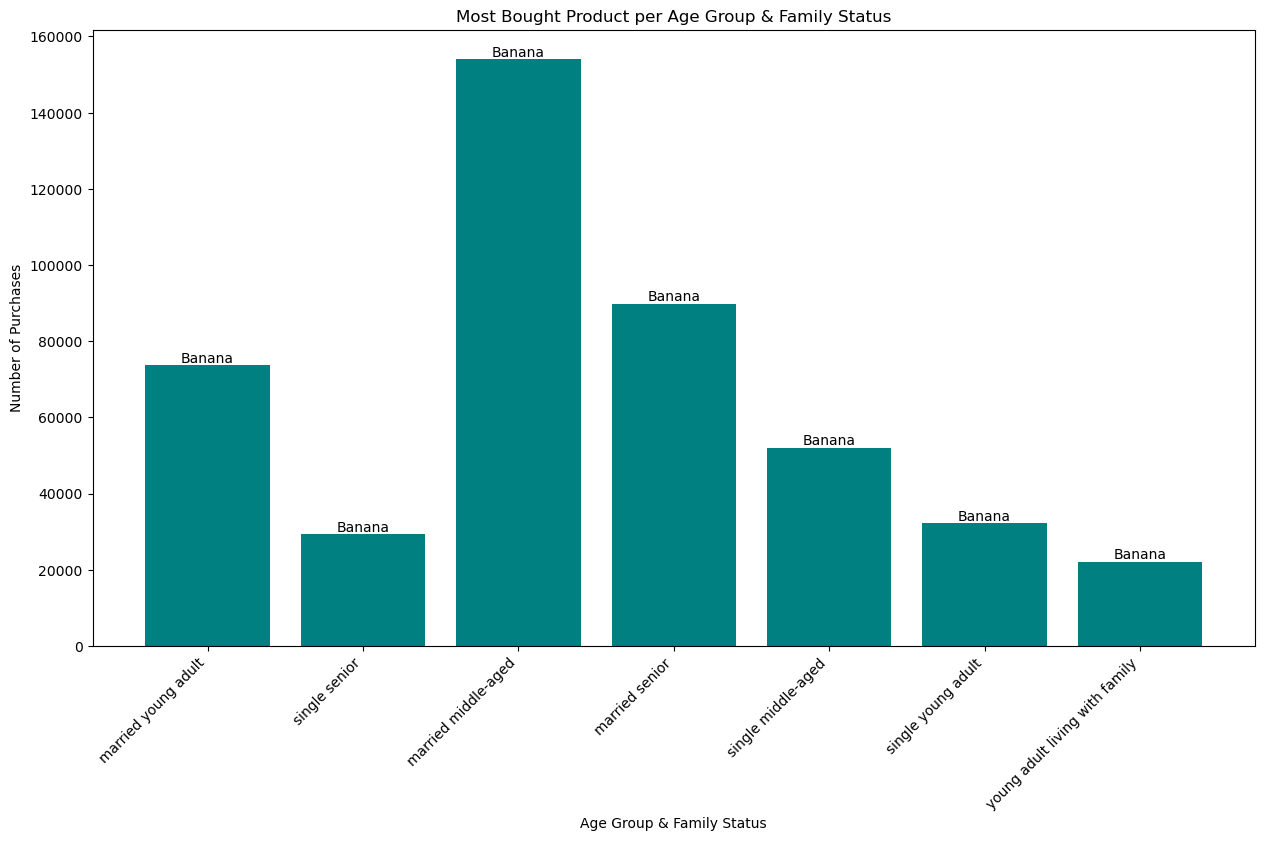

In [217]:
# Get unique age group + family status combinations
unique_age_fam_statuses = co['age_group_fam_status'].unique()

# Create a bar chart for each age group + family status combination
plt.figure(figsize=(15, 8))

for age_fam_status in unique_age_fam_statuses:
    most_common_product = co[co['age_group_fam_status'] == age_fam_status]['product_name'].value_counts().idxmax()
    count = co[co['age_group_fam_status'] == age_fam_status]['product_name'].value_counts()[most_common_product]
    plt.bar(age_fam_status, count, color='teal')
    plt.text(age_fam_status, count, most_common_product, ha='center', va='bottom', fontsize=10, color='black')

plt.title("Most Bought Product per Age Group & Family Status")
plt.xlabel("Age Group & Family Status")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45, ha='right')

# Save the chart to a file
plt.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\most_bought_per_age_fam_status_bar.png", bbox_inches='tight')

#### Per Age Group and Class Level

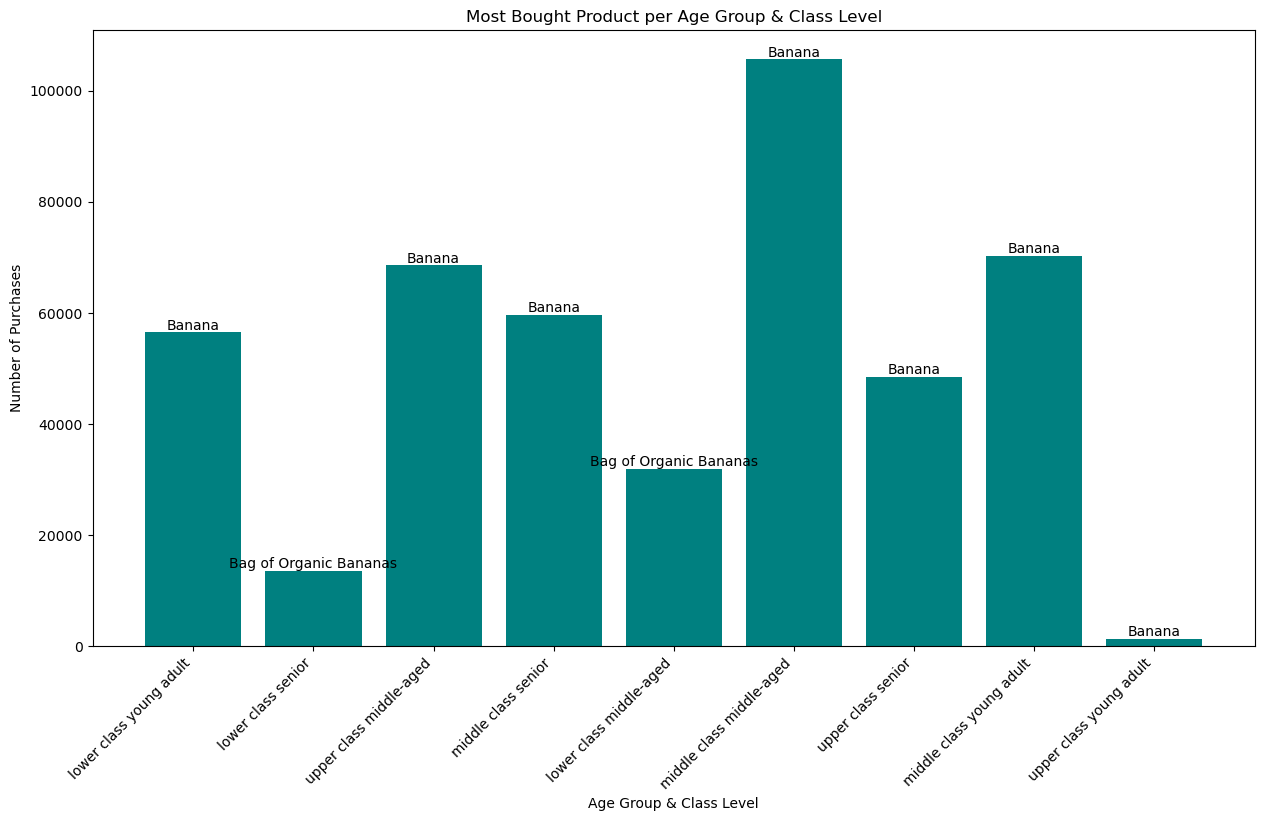

In [218]:
# Get unique age group class levels
unique_age_class_levels = co['age_group_class_level'].unique()

# Create a bar chart for each age group class level
plt.figure(figsize=(15, 8))

for age_class_level in unique_age_class_levels:
    most_common_product = co[co['age_group_class_level'] == age_class_level]['product_name'].value_counts().idxmax()
    count = co[co['age_group_class_level'] == age_class_level]['product_name'].value_counts()[most_common_product]
    plt.bar(age_class_level, count, color='teal')
    plt.text(age_class_level, count, most_common_product, ha='center', va='bottom', fontsize=10, color='black')

plt.title("Most Bought Product per Age Group & Class Level")
plt.xlabel("Age Group & Class Level")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45, ha='right')

# Save the chart to a file
plt.savefig(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\04 Analysis\Visualizations\most_bought_per_age_class_bar.png", bbox_inches='tight')

# Export dataframe

In [8]:
# Export modified main dataframe

co.to_pickle(r"C:\Users\xherr\Desktop\A4 Data Immersion\Instacart Basket Analysis\02 Data\Prepared Data\ultimate dataframe (T4.10.2) steps 6-10.pkl")